## 6.2 Exploring Relationships

### Importing libraries and data

In [1]:
#Setting up the environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Create a path
path = r'C:\Users\manny\Documents\Circulatory Death Analysis'

In [6]:
#Import data set

df_deaths=pd.read_csv(r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data\mortalityrate.csv',index_col=False)

### Data Cleaning

In [7]:
#Show data
df_deaths.head()

,State,State Code,Race,Ten-Year Age Groups,Ten-Year Age Groups Code,Year,Gender,Gender Code,Deaths,Population,Death Proportion
0,Alabama,1,Asian or Pacific Islander,55-64 years,55-64,2017,Male,M,10,3373,0
1,Alabama,1,Asian or Pacific Islander,65-74 years,65-74,2017,Male,M,10,1711,1
2,Alabama,1,Asian or Pacific Islander,65-74 years,65-74,2020,Female,F,13,3339,0
3,Alabama,1,Asian or Pacific Islander,75-84 years,75-84,2016,Female,F,11,992,1
4,Alabama,1,Asian or Pacific Islander,75-84 years,75-84,2017,Female,F,10,1041,1


In [8]:
# Find missing values
df_deaths.isnull().sum()

State                       0
State Code                  0
Race                        0
Ten-Year Age Groups         0
Ten-Year Age Groups Code    0
Year                        0
Gender                      0
Gender Code                 0
Deaths                      0
Population                  0
Death Proportion            0
dtype: int64

#### No missing values

In [9]:
# Finding duplicates

df_dups=df_deaths[df_deaths.duplicated()]

In [10]:
df_dups

,State,State Code,Race,Ten-Year Age Groups,Ten-Year Age Groups Code,Year,Gender,Gender Code,Deaths,Population,Death Proportion


#### No duplicate data

In [11]:
# Checking for mixed type data

for col in df_deaths.columns.tolist():
  weird = (df_deaths[[col]].applymap(type) != df_deaths[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_deaths[weird]) > 0:
    print (col)

#### No mixed data types

In [12]:
#Check for datatype
df_deaths.dtypes

State                       object
State Code                   int64
Race                        object
Ten-Year Age Groups         object
Ten-Year Age Groups Code    object
Year                         int64
Gender                      object
Gender Code                 object
Deaths                       int64
Population                   int64
Death Proportion             int64
dtype: object

### Creating a Correlation Matrix Heatmap

In [13]:
# Create a correlation matrix using pandas
df_deaths.corr()

C:\Users\manny\AppData\Local\Temp\ipykernel_21824\3440796917.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_deaths.corr()


,State Code,Year,Deaths,Population,Death Proportion
State Code,1.000000,-0.002313,-0.021870,-0.040174,0.003164
Year,-0.002313,1.000000,0.005916,-0.007206,-0.001086
Deaths,-0.021870,0.005916,1.000000,0.190586,0.349968
Population,-0.040174,-0.007206,0.190586,1.000000,-0.265788
Death Proportion,0.003164,-0.001086,0.349968,-0.265788,1.000000


C:\Users\manny\AppData\Local\Temp\ipykernel_21824\2314836784.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_deaths.corr())


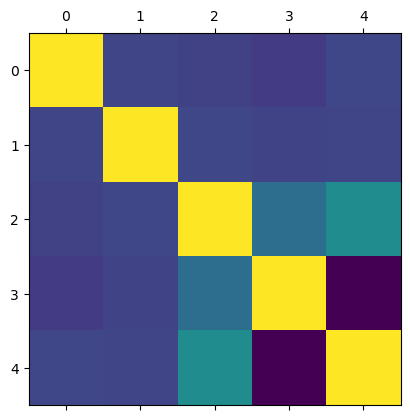

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_deaths.corr())
plt.show()

C:\Users\manny\AppData\Local\Temp\ipykernel_21824\2351948881.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_deaths.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


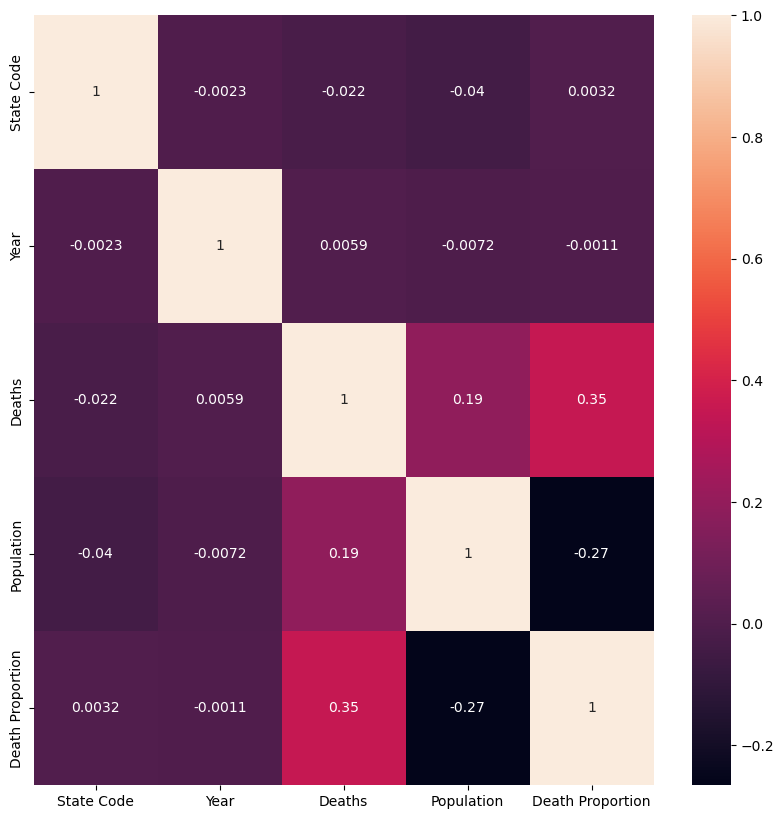

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_deaths.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### All of the variables show weak relationsips. The strongest out of all of them is between Deaths and Death Proportion

### ### Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships

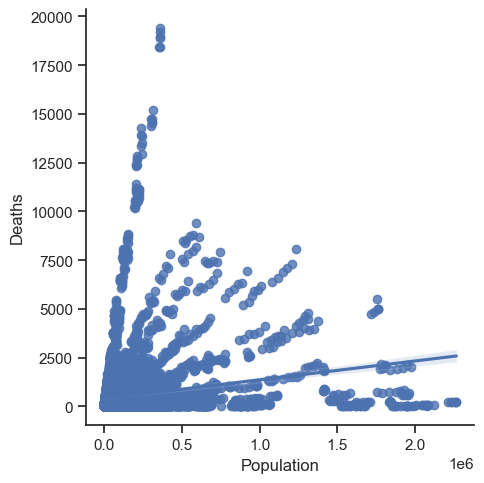

In [34]:
sns.lmplot(x = 'Population', y = 'Deaths', data = df_deaths)

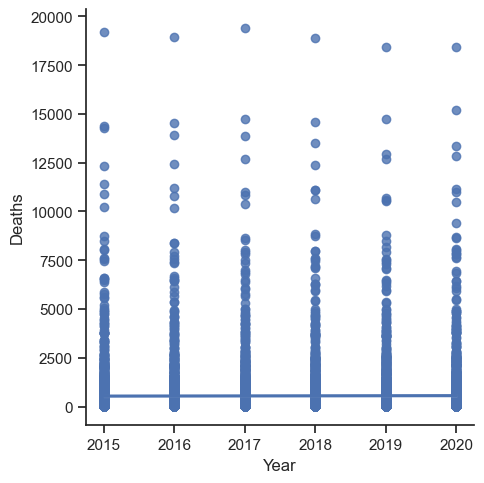

In [35]:
sns.lmplot(x = 'Year', y = 'Deaths', data = df_deaths)

#### Shows a weak relationship

### Create a pair plot of the entire data set.

In [21]:
sub_2 = df_deaths[['State Code', 'Year', 'Deaths', 'Population', 'Death Proportion']]

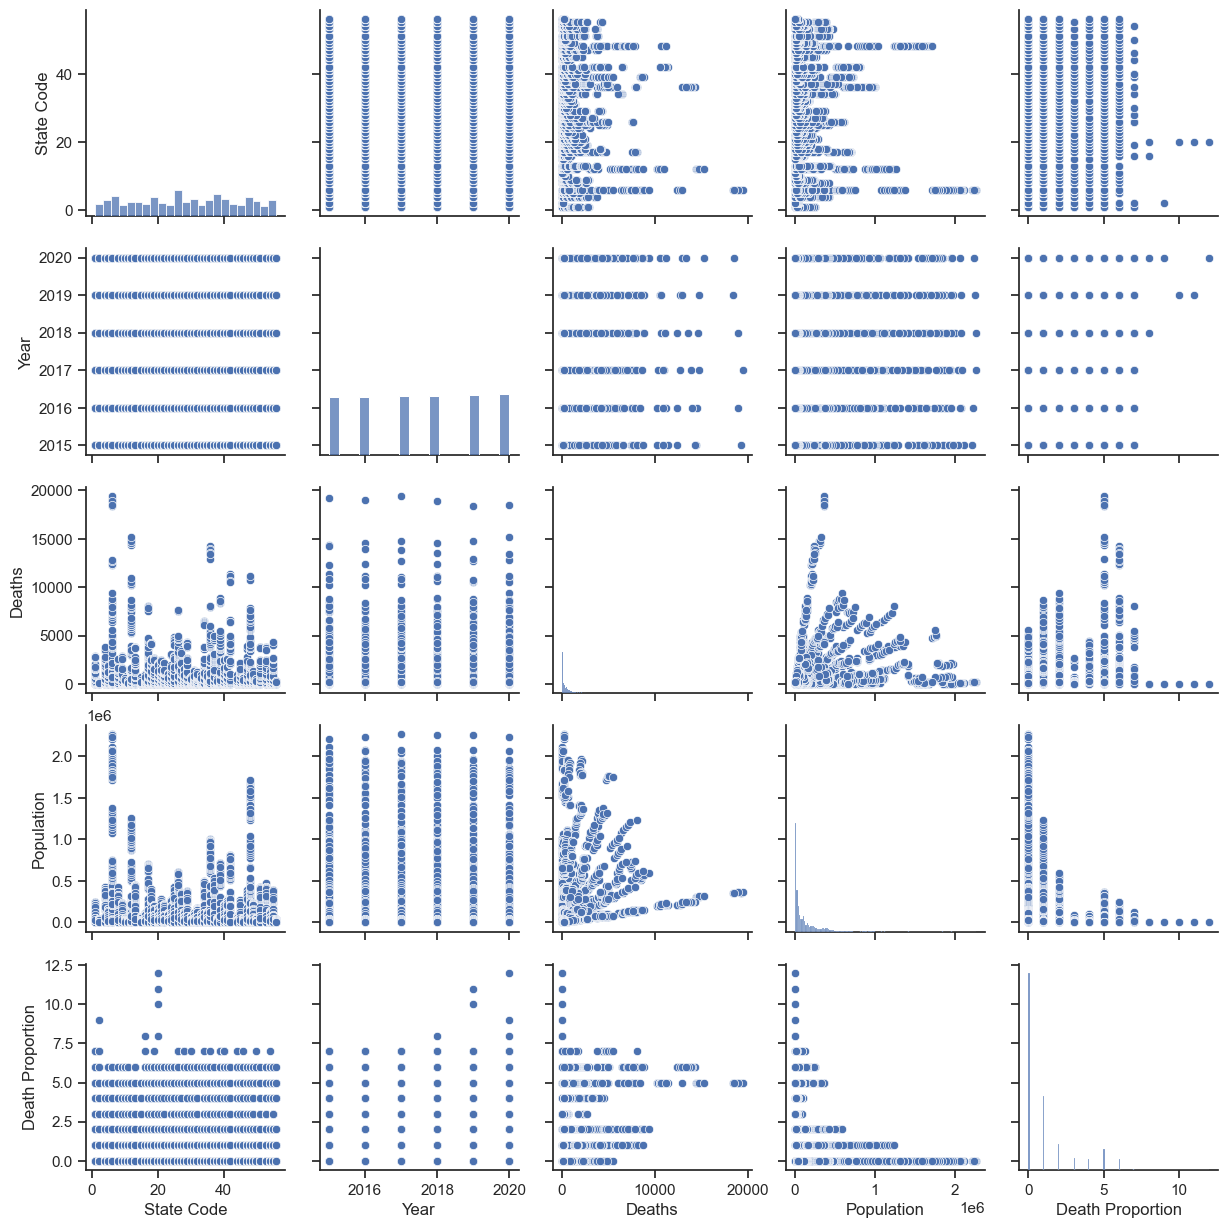

In [31]:
g = sns.pairplot(sub_2)

### Create a categorical plot and interpret the results

<Axes: xlabel='Deaths', ylabel='Count'>

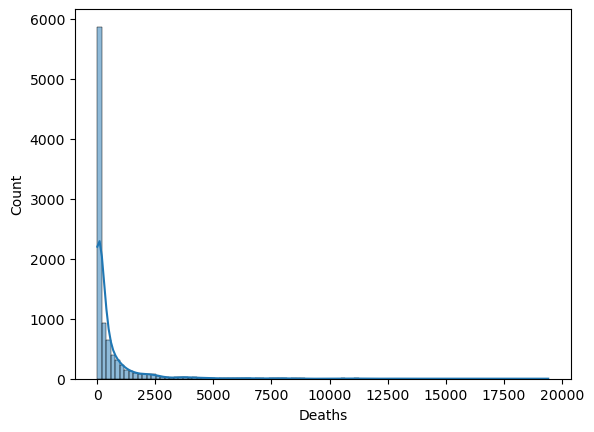

In [23]:
sns.histplot(df_deaths['Deaths'], bins = 100, kde = True)

In [24]:
#Creat Death Rate Flag
df_deaths.loc[df_deaths['Deaths'] < 5000, 'Death Rate'] = 'Low Rate'
df_deaths.loc[df_deaths['Deaths'] > 10000, 'Death Rate'] = 'High Rate'
df_deaths.loc[(df_deaths['Deaths'] >= 5000) & (df_deaths['Deaths'] < 10000), 'Death Rate'] = 'Middle Rate'

In [25]:
df_deaths['Death Rate'].value_counts(dropna = False)

Low Rate       9336
Middle Rate     109
High Rate        42
Name: Death Rate, dtype: int64

In [26]:
#Sort Data
df_sort=df_deaths.sort_values(by=['Ten-Year Age Groups'])

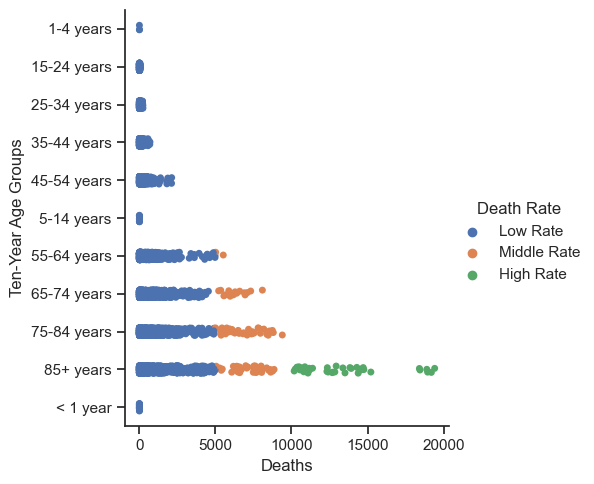

In [27]:
# Create a categorical plot in seaborn
sns.set(style="ticks")
g = sns.catplot(x="Deaths", y="Ten-Year Age Groups", hue="Death Rate", data=df_sort)